# 📊 Data-Driven Churn Analysis and Predictive Modeling


# 📥 Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv("churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 📋 Step 2: Data Understanding & Cleaning

In [3]:
print("Shape:", df.shape)
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Shape: (7043, 21)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBil

In [4]:
# Drop irrelevant column
df.drop("customerID", axis=1, inplace=True)

In [5]:
# Convert TotalCharges to numeric (some entries are blank/strings)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [6]:
# Handle missing values in TotalCharges
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# 📊 Step 3: Churn Distribution

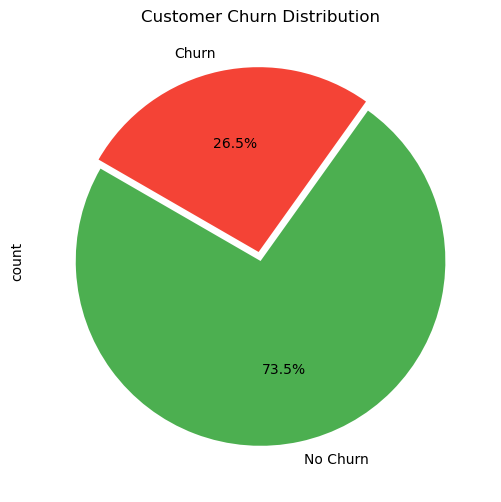

In [7]:
plt.figure(figsize=(6,6))
df["Churn"].value_counts().plot.pie(
    autopct="%1.1f%%", 
    startangle=150, 
    labels=["No Churn","Churn"], 
    explode=[0,0.05],
    colors=["#4CAF50","#F44336"]
)
plt.title("Customer Churn Distribution")
plt.show()

# 🔍 Step 4: Univariate Analysis (Numerical Features)

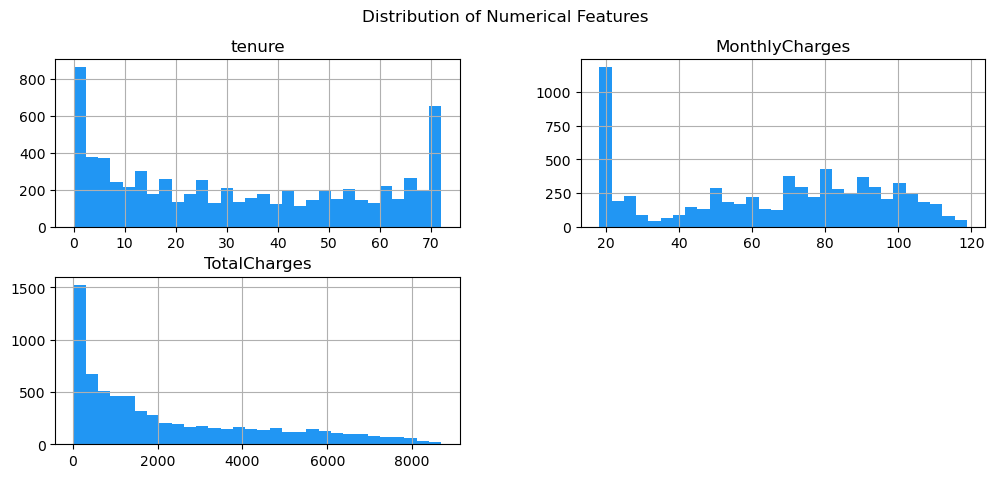

In [8]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[num_cols].hist(bins=30, figsize=(12,5), color="#2196F3")
plt.suptitle("Distribution of Numerical Features")
plt.show()

# 🧩 Step 5: Bivariate Analysis (Churn vs Features)

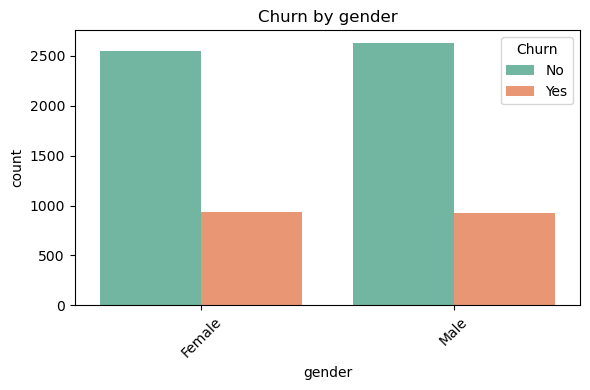

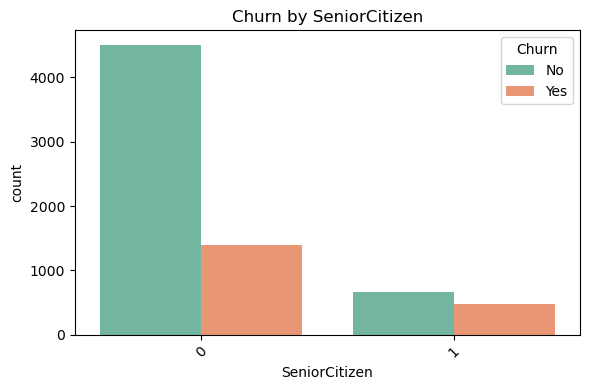

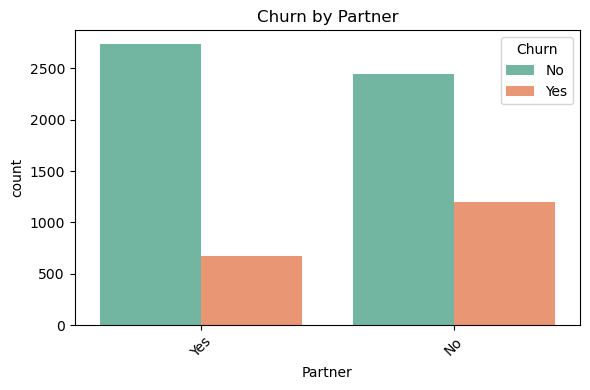

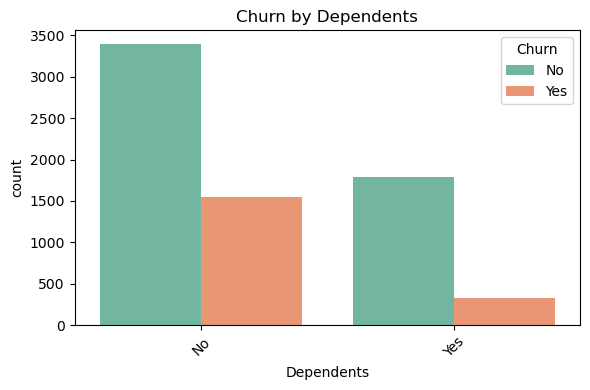

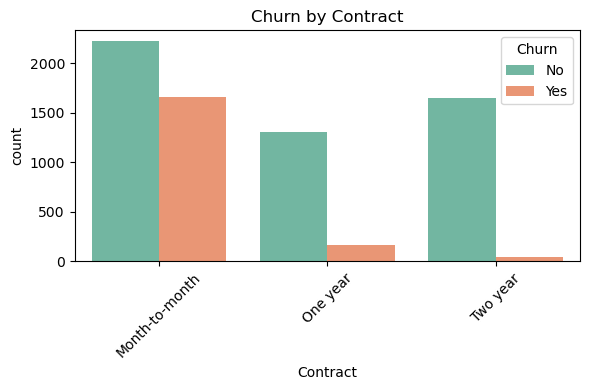

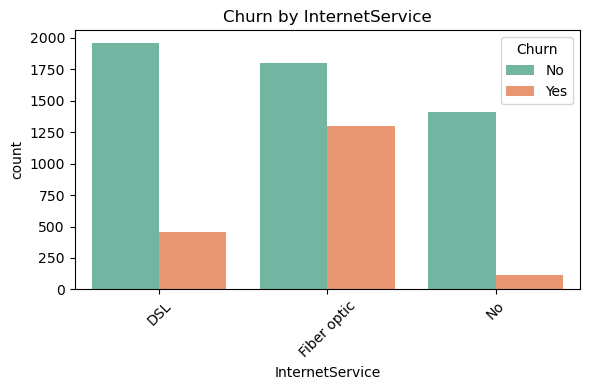

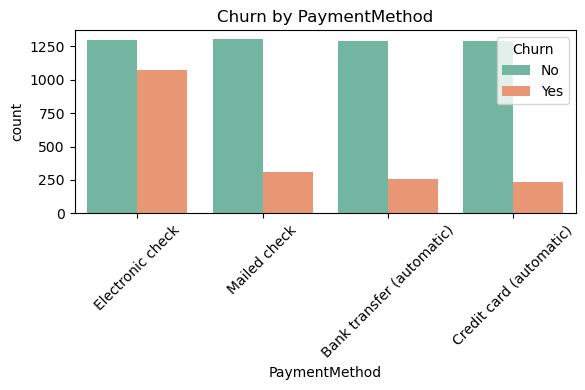

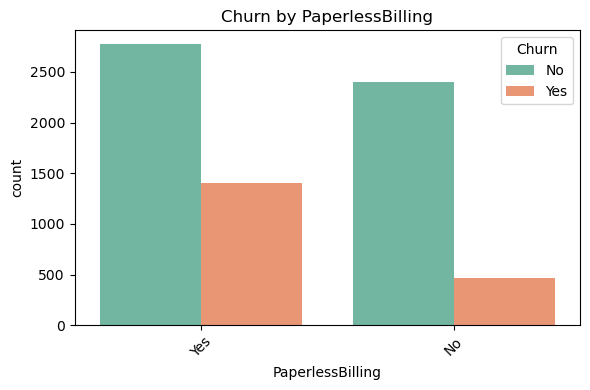

In [9]:
# Categorical features vs Churn
cat_cols = ["gender","SeniorCitizen","Partner","Dependents",
            "Contract","InternetService","PaymentMethod","PaperlessBilling"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Churn", palette="Set2")
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


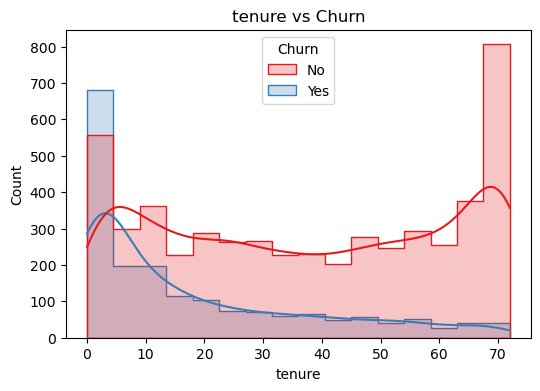

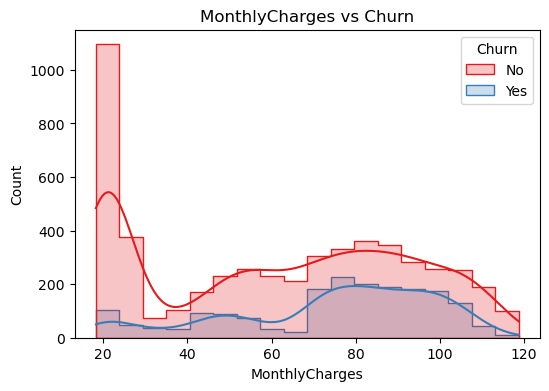

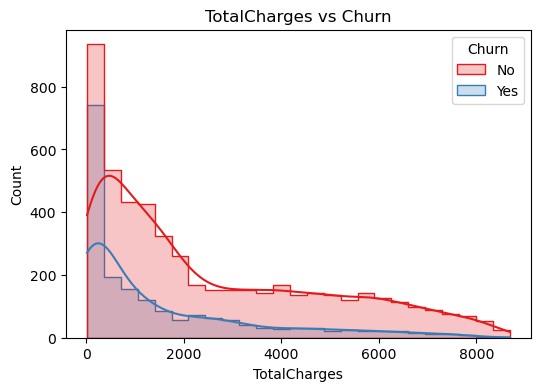

In [10]:
# Numerical features vs Churn
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="Churn", kde=True, element="step", palette="Set1")
    plt.title(f"{col} vs Churn")
    plt.show()


# 🧮 Step 6: Correlation Analysis

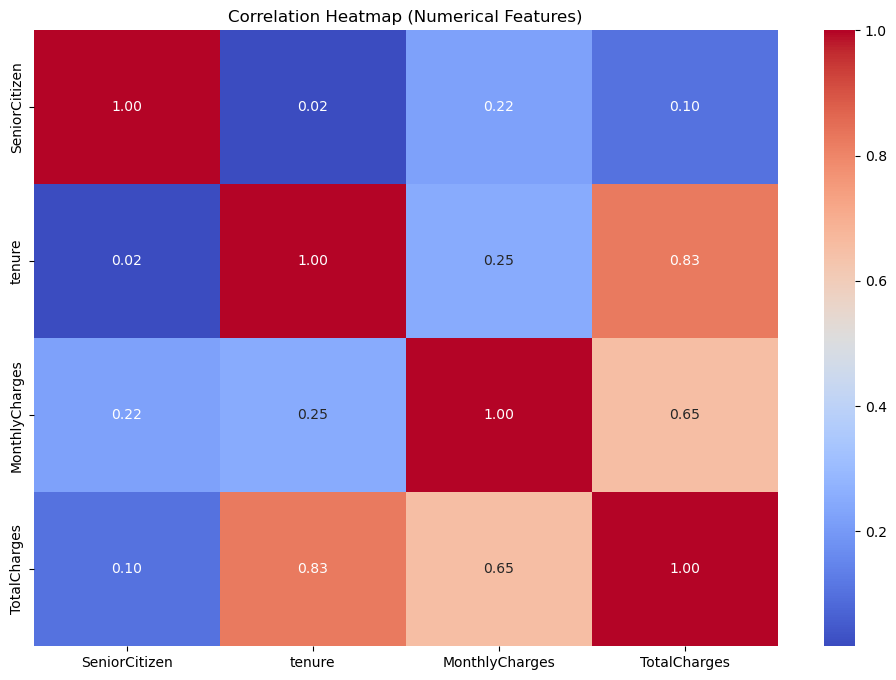

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


# 📆 Step 7: Cohort-like Tenure Analysis

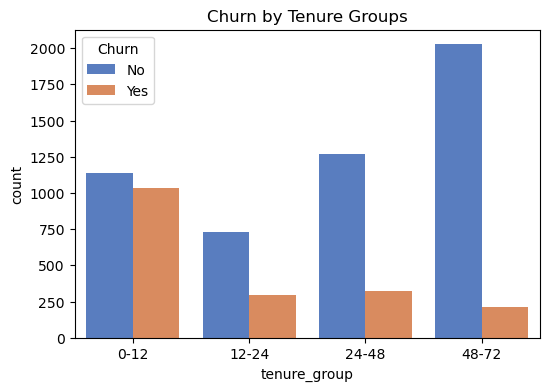

In [12]:
df["tenure_group"] = pd.cut(df["tenure"], bins=[0,12,24,48,72], labels=["0-12","12-24","24-48","48-72"])
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="tenure_group", hue="Churn", palette="muted")
plt.title("Churn by Tenure Groups")
plt.show()

# 🔧 Step 8: Feature Engineering

In [13]:
# Create Average Charges per Month
df["AvgChargesPerMonth"] = df["TotalCharges"] / df["tenure"].replace(0,1)


In [14]:
# Create feature: Number of services subscribed
df["MultipleServices"] = (df[["PhoneService","MultipleLines","OnlineSecurity",
                              "OnlineBackup","DeviceProtection","TechSupport",
                              "StreamingTV","StreamingMovies"]] == "Yes").sum(axis=1)
print("\nSample engineered features:")
print(df[["tenure","MonthlyCharges","TotalCharges","AvgChargesPerMonth","MultipleServices"]].head())



Sample engineered features:
   tenure  MonthlyCharges  TotalCharges  AvgChargesPerMonth  MultipleServices
0       1           29.85         29.85           29.850000                 1
1      34           56.95       1889.50           55.573529                 3
2       2           53.85        108.15           54.075000                 3
3      45           42.30       1840.75           40.905556                 3
4       2           70.70        151.65           75.825000                 1


# 📏 Step 9: Feature Scaling

In [15]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[["tenure","MonthlyCharges","TotalCharges","AvgChargesPerMonth"]] = scaler.fit_transform(
    df_scaled[["tenure","MonthlyCharges","TotalCharges","AvgChargesPerMonth"]])


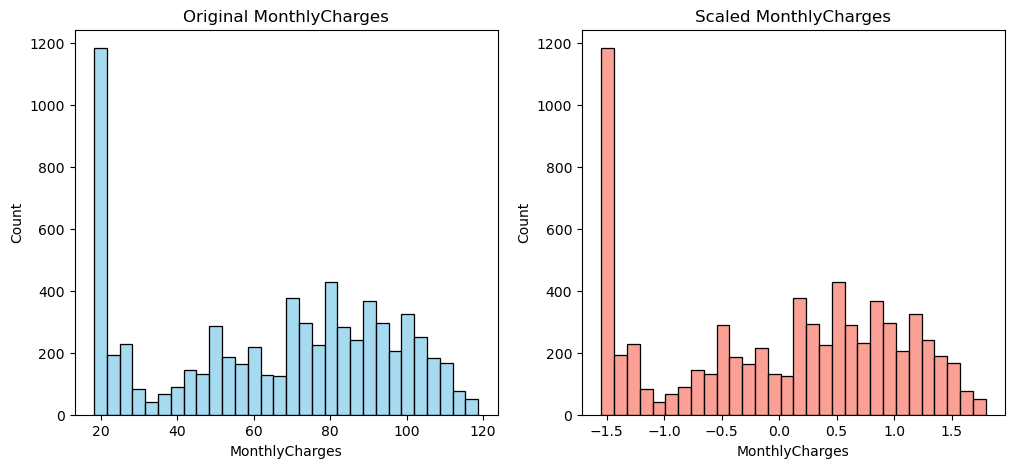

In [16]:
# Compare before vs after scaling
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df["MonthlyCharges"], bins=30, ax=axes[0], color="skyblue")
axes[0].set_title("Original MonthlyCharges")

sns.histplot(df_scaled["MonthlyCharges"], bins=30, ax=axes[1], color="salmon")
axes[1].set_title("Scaled MonthlyCharges")

plt.show()

# 🏷️➡️🔢Step 10: Encode Categorical Variables

To make the dataset suitable for machine learning, categorical variables need to be converted into numerical format using **Label Encoding**:

- **Identify categorical features** using `select_dtypes`.
- **Exclude the target variable `Churn`**, since it will be encoded separately.
- **Apply `LabelEncoder`** to each categorical column, assigning a unique integer to every category.
- **Encode the target variable `Churn`**: map `'Yes'` to **1** (churned) and `'No'` to **0** (retained).

This transformation is crucial because most machine learning algorithms can only process numerical input.


In [19]:
# Encode Categorical Columns.
le=LabelEncoder()
# Identify categorical features
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df['tenure_group'] = le.fit_transform(df['tenure_group'])   #separately needed as dtype is categorical
# Remove target column 'Churn' from encoding (we'll handle it separately)
cat_cols.remove('Churn')
# Apply Label Encoding to all categorical features except the target
for col in cat_cols:
 df[col] = le.fit_transform(df[col])
# Encode the target 'Churn' to binary: Yes -> 1, No -> 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Step 11: 📊 Data Split using Train-Test Split


In [20]:
# Prepare Features & Target Variable
# We’ll separate the input features (X) and the target (y = Churn), then split the data into training and testing sets:
# Features (drop target)
X = df.drop('Churn', axis=1)
# Target
y = df['Churn']
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f" Training set shape: {X_train.shape}")
print(f" Test set shape: {X_test.shape}")

 Training set shape: (5634, 22)
 Test set shape: (1409, 22)


# Step 12: 🤖 Logistic Regression Model Training

In [21]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Step 13: 📈 Evaluating Model Performance

In [22]:
# Logistic Regression Evaluation
print(" Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))

 Logistic Regression:
Accuracy: 0.8126330731014905
Confusion Matrix:
 [[931 105]
 [159 214]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



# Step 14: 🔲 → confusion matrix visualization

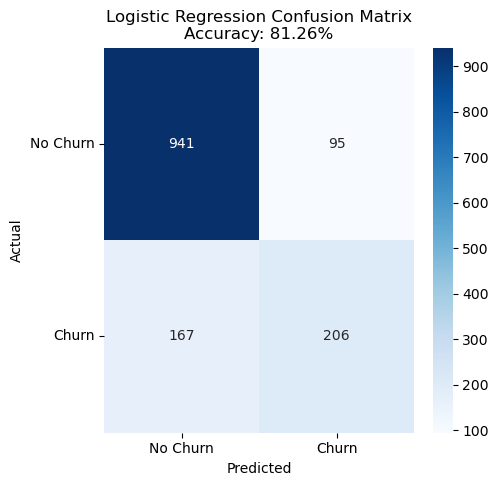

In [24]:
# Confusion matrix
log_cm = [[941, 95], [167, 206]]

plt.figure(figsize=(5,5))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues')

plt.title("Logistic Regression Confusion Matrix\nAccuracy: 81.26%")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ['No Churn', 'Churn'])
plt.yticks([0.5, 1.5], ['No Churn', 'Churn'], rotation=0)
plt.show()


# Step 15: 📝 Model Performance Summary


**Logistic Regression Results**

- **Accuracy:** `81.26%`  
- **Strength:** High precision in predicting **non-churners** (`85%`)  
- **Limitation:** Lower recall for **churners** (`57%`) → some churn cases are missed


# 🧾 Final Insights & Recommendations

**Overall churn rate:** **26.5%** across **7,043** customers.


## 🔑 Key Findings (what drives churn)

- **Contract type (strongest driver)**
  - **Month-to-month:** **42.7%**
  - **One year:** **11.3%**
  - **Two year:** **2.8%**  
  → Lock-in contracts drastically reduce churn.

- **Tenure (time with company)**
  - Avg tenure — **Churned:** **18.0** months (median **10**) • **Retained:** **37.6** (median **38**)
  - Churn by tenure bucket: **0–6m: 52.9%**, **6–12m: 35.9%**, **12–24m: 28.7%**, **24–48m: 20.4%**, **48–72m: 9.5%**  
  → Early lifecycle (first 6–12 months) is the riskiest.

- **Price sensitivity (MonthlyCharges)**
  - Avg monthly charge — **Churned:** **74.44** • **Retained:** **61.27**
  - By price tier: **Low: 15.9%**, **Mid: 29.7%**, **High: 34.1%**  
  → Higher bills correlate with higher churn.

- **Internet service**
  - **Fiber optic:** **41.9%**, **DSL:** **19.0%**, **No internet service:** **7.4%**  
  → Fiber customers churn more; likely linked to higher prices/expectations.

- **Payment & billing behavior**
  - **Electronic check:** **45.3%** (highest)  
  - **Auto-pay (credit): 15.2%**, **Auto-pay (bank): 16.7%**, **Mailed check: 19.1%**
  - **Paperless billing:** **Yes 33.6%** vs **No 16.3%**  
  → Auto-pay correlates with lower churn; electronic check is a risk flag. (Paperless likely confounded with contract/tenure.)

- **Value-add services (correlate with retention)**
  - **OnlineSecurity:** **No 41.8%** vs **Yes 14.6%**  
  - **TechSupport:** **No 41.6%** vs **Yes 15.2%**  
  - **DeviceProtection:** **No 39.1%** vs **Yes 22.5%**  
  - **OnlineBackup:** **No 39.9%** vs **Yes 21.5%**  
  - Services count (bundling): **0–2: 26.4%**, **3–4: 34.0%**, **5–8: 20.3%**  
  → Having **security/support** and **more bundled services** is associated with lower churn; moderately heavy users (3–4 services) look price-sensitive.

- **Demographics & household**
  - **Gender:** roughly flat (Female **26.9%**, Male **26.2%**)  
  - **Senior citizens:** higher churn (**41.7%**) vs non-seniors (**23.6%**)  
  - **Partner/Dependents:** with partner (**19.7%**) / dependents (**15.5%**) churn less than those without (33.0% / 31.3%).  
  → Demographics aren’t primary levers but can help with targeting.


## 🧭 Recommendations

1. **Convert month-to-month to term contracts** with targeted offers (loyalty discounts, free add-ons).  
2. **Front-load retention in the first 6–12 months** (welcome call, education, first-bill review, satisfaction checks).  
3. **Address high-bill pain**: create value bundles or tiered discounts for high-charge segments.  
4. **Bundle support & security** (OnlineSecurity + TechSupport) and offer **free trials** to at-risk users.  
5. **Drive product bundling**: nudge customers from **0–2** to **3–4+** services within the first 90 days.  
6. **Promote auto-pay** (credit/bank) and monitor **electronic-check** payers as a high-risk cohort.  
7. **Segment fiber customers** to understand drivers (price vs service issues) and tailor offers.  

